In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Questão 21


## 1) Entrar os coeficientes

max $z = 60x1 + 30x2$

sujeito a

$6x1 + 8x2 <= 40$

$x1 <= 6$

$x2 <= 4$

consideração: entrar com as restrições em formado de >= 

In [2]:
A = [[-6, -8],[-1, 0], [0, -1]]
B = [-48, -6, -4]
C = [-60, -30]
prob = 'min'
ineq = []
non_negative = True

## 2) printar a função objetiva e as restrições

In [3]:
def f_a(A, B, C, prob, ineq, non_negative=True) -> None:
    ineq = []

    if not ineq:
        if prob == 'max':
            ineq = ['<='] * len(B)
        elif prob == 'min':
            ineq = ['>='] * len(B)

    print(f"Otimização de:  {prob} Z = {C[0]}x + {C[1]}y")

    print("\nSujeito a:")
    for i in range(len(A)):
        print(f"        {A[i][0]}x + {A[i][1]}y {ineq[i]} {B[i]}")
    
    if non_negative:
        print("\n Tal que: x, y >= 0")

    return None

In [4]:
f_a(A, B, C, prob, ineq, non_negative)

Otimização de:  min Z = -60x + -30y

Sujeito a:
        -6x + -8y >= -48
        -1x + 0y >= -6
        0x + -1y >= -4

 Tal que: x, y >= 0


## 3) printar a função objetiva e as restrições

### Melhorar essa etapa do codigo, pois ainda nao usa os coeficientes, essa etapa é hard code

Text(0, 0.5, '$y$')

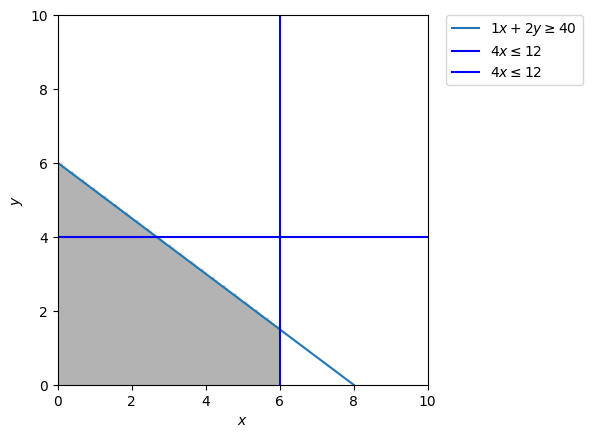

In [9]:
d = np.linspace(-2,20,300)

x,y = np.meshgrid(d,d)

# plt.imshow( (-3*y >= (-480 + 6*x)) & # -6x + -3y >= -480
#              (3*y >= (450 - 6*x)) & # 6x + 3y >= 450
#              (-4*y <= (-480 + 2*x)) & # -2x + -4y >= -480
#              (4*y <= (450 - 2*x)) # 2x + 4y >= 450
#              ).astype(int) , 
#                 extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

plt.imshow( ((-8*y >= (-48 + 6*x)) & #  -6x + -8y >= -48
             (0*y >= (-6 + 1*x)) &
             (1*y >= (-4 - 0*x)) 
             ).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
#Dado que x = x1 
#         y = x2

x = np.linspace(0, 20, 2000)
y1 = -((-48 + 6*x)/8.00)
#y3 = -((-480 + 2*x)/4.00)

# Make plot
#plt.plot(3, 0)
plt.plot(x, y1, label=r'$1x + 2y \geq 40$')
plt.axvline(x=6, color='b', label='$4x \leq 12$')
plt.axhline(y=4, color='b', label='$4x \leq 12$')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## 4) Calcular as interseções

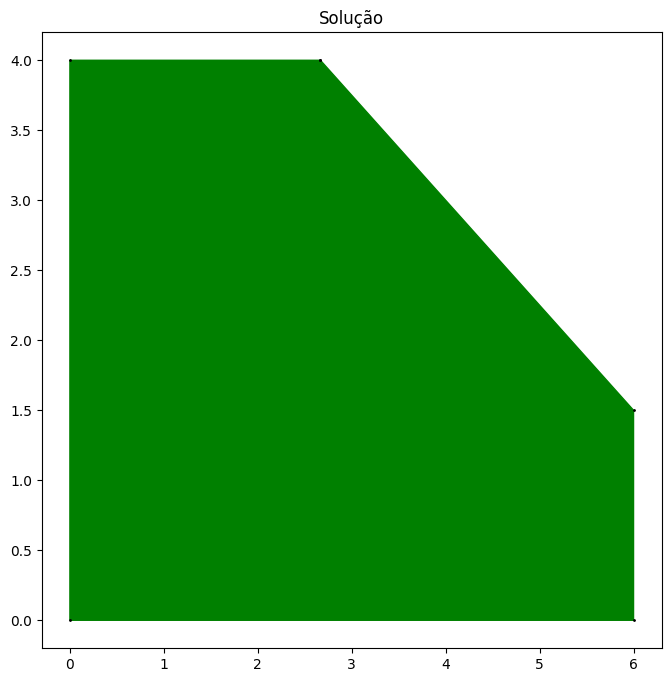

In [10]:
from intvalpy import lineqs
import numpy as np

A = np.array(A)
b = np.array(B)

dots = lineqs(A, b, title='Solução', s=1.0, bounds=[[0, 0], [100, 100]], color='Green', alpha=1.0, size=(8,8), save=True)

In [11]:
print(dots)

[[2.66666667 4.        ]
 [6.         1.5       ]
 [6.         0.        ]
 [0.         0.        ]
 [0.         4.        ]]


## 5) Calcular os calores da função objetica

In [12]:
print(f"Dado: Z = {C[0]}x + {C[1]}y \n")

z_solutions = {}
x_list = []
for dot in dots:
    solution = round(C[0]*dot[0] + C[1]*dot[1], 4)
    ponto = f"{dot[0]},{dot[1]}"
    z_solutions.update({solution: ponto})
    
    print(f"Z({ponto}) = {solution}")

Dado: Z = -60x + -30y 

Z(2.666666666667,4.0) = -280.0
Z(6.0,1.5) = -405.0
Z(6.0,0.0) = -360.0
Z(0.0,0.0) = -0.0
Z(0.0,4.0) = -120.0


In [13]:
z_solutions

{-280.0: '2.666666666667,4.0',
 -405.0: '6.0,1.5',
 -360.0: '6.0,0.0',
 -0.0: '0.0,0.0',
 -120.0: '0.0,4.0'}

 ## 6) Retornar o valor de menor ou maior dependendo da otimizacao

In [14]:
z_solutions[min(z_solutions)]

'6.0,1.5'

In [15]:
if prob == 'max':
    print(f"O valor maximo da zona factivel é {max(z_solutions)} encontrado no ponto Z({z_solutions[max(z_solutions)]})")
elif prob == 'min':
    if min(z_solutions) < 0:
        result = min(z_solutions) * -1
    else:
        result = min(z_solutions)
    print(f"O valor minimo da zona factivel é {result} encontrado no ponto Z({z_solutions[min(z_solutions)]})")

O valor minimo da zona factivel é 405.0 encontrado no ponto Z(6.0,1.5)
